## Otimização de Hiperparâmetros e Regularização com os dados do Fashion-MNIST

Aluno: Wallace de Castro Galvão

Epoch 1/50


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


750/750 ━━━━━━━━━━━━━━━━━━━━ 617s 817ms/step - accuracy: 0.6510 - loss: 1.8822 - val_accuracy: 0.8485 - val_loss: 1.0997 - learning_rate: 0.0010
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 613s 817ms/step - accuracy: 0.8030 - loss: 1.1693 - val_accuracy: 0.8630 - val_loss: 0.8752 - learning_rate: 0.0010
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 611s 815ms/step - accuracy: 0.8314 - loss: 0.9354 - val_accuracy: 0.8426 - val_loss: 0.8312 - learning_rate: 0.0010
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 621s 814ms/step - accuracy: 0.8489 - loss: 0.8146 - val_accuracy: 0.8688 - val_loss: 0.7386 - learning_rate: 0.0010
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 611s 815ms/step - accuracy: 0.8495 - loss: 0.7917 - val_accuracy: 0.8167 - val_loss: 0.9078 - learning_rate: 0.0010
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 612s 815ms/step - accuracy: 0.8537 - loss: 0.7999 - val_accuracy: 0.8674 - val_loss: 0.7486 - learning_rate: 0.0010
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 622s 816ms/step - accuracy: 0.8536 

Perda no Teste: 0.3318, Acurácia no Teste: 0.9226
Modelo salvo como 'cnn_model_fashion_mnist_95_acc.h5'.


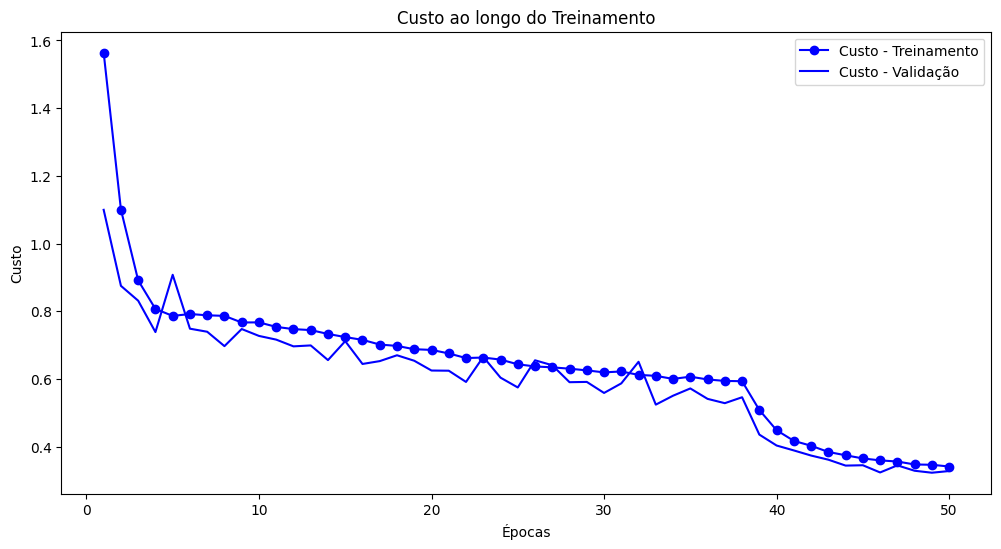

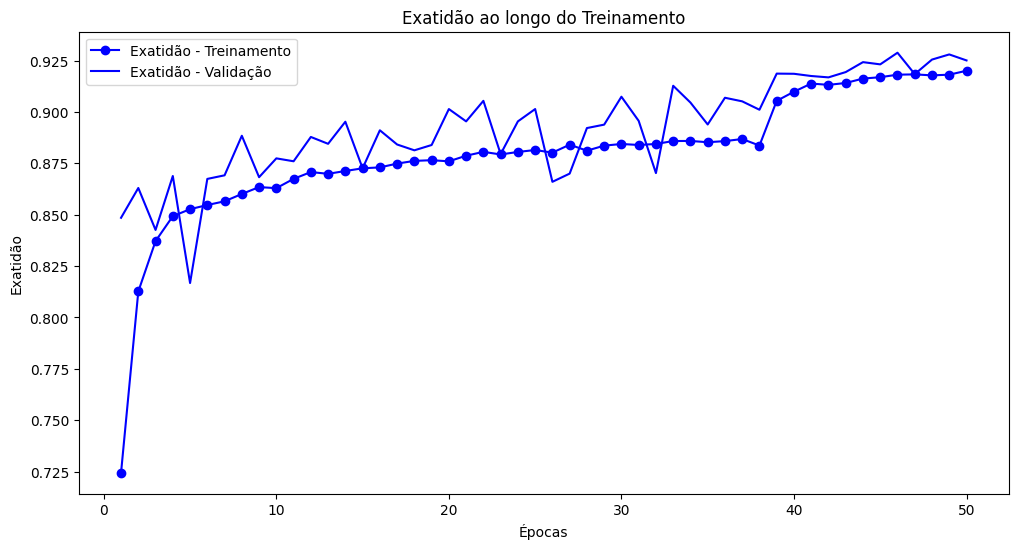

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

# Carregar dados do Fashion-MNIST
(X_train_full, Y_train_full), (X_test, Y_test) = fashion_mnist.load_data()

# Normalização e redimensionamento
X_train_full = X_train_full.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train_full = X_train_full.reshape(X_train_full.shape[0], 28, 28, 1)  # (28, 28, 1) para CNN
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# One-hot encoding para os rótulos
Y_train_full_hot = to_categorical(Y_train_full, 10)
Y_test_hot = to_categorical(Y_test, 10)

# Divisão entre conjunto de treinamento e validação (80% treinamento e 20% validação)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_full, Y_train_full_hot, test_size=0.2, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

# Função de criação do modelo CNN
def build_cnn_model(input_shape, lamb):
    model = models.Sequential()
    
    # Primeira camada convolucional
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape,
                            kernel_regularizer=regularizers.l2(lamb)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(lamb)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    # Segunda camada convolucional
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(lamb)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(lamb)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    # Terceira camada convolucional
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(lamb)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(lamb)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))
    
    # Flatten para transformar em vetor
    model.add(layers.Flatten())
    
    # Camada densa
    model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(lamb)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    
    # Camada de saída
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

# Parâmetros de regularização e taxa de aprendizado
lamb = 0.0005  # Regularização L2
learning_rate = 0.001

# Criar o modelo CNN
cnn_model = build_cnn_model((28, 28, 1), lamb)

# Compilação do modelo
cnn_model.compile(optimizer=Adam(learning_rate=learning_rate), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

# Treinamento com data augmentation e validação
history = cnn_model.fit(datagen.flow(X_train, Y_train, batch_size=64),
                        epochs=50,
                        validation_data=(X_val, Y_val),
                        callbacks=[early_stopping, reduce_lr],
                        verbose=1)

# Avaliação no conjunto de teste
test_loss, test_accuracy = cnn_model.evaluate(X_test, Y_test_hot)
print(f"Perda no Teste: {test_loss:.4f}, Acurácia no Teste: {test_accuracy:.4f}")

# Salvar o modelo treinado
cnn_model.save('cnn_model_fashion_mnist_95_acc.h5')
print("Modelo salvo como 'cnn_model_fashion_mnist_95_acc.h5'.")

# Visualização dos resultados

# Plotando Custo e Exatidão durante o treinamento
history_dict = history.history
custo = history_dict['loss']
val_custo = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(custo) + 1)

# Gráfico de Custo
plt.figure(figsize=(12, 6))
plt.plot(epochs, custo, 'bo-', label='Custo - Treinamento')
plt.plot(epochs, val_custo, 'b-', label='Custo - Validação')
plt.title('Custo ao longo do Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.legend()
plt.show()

# Gráfico de Exatidão
plt.figure(figsize=(12, 6))
plt.plot(epochs, acc, 'bo-', label='Exatidão - Treinamento')
plt.plot(epochs, val_acc, 'b-', label='Exatidão - Validação')
plt.title('Exatidão ao longo do Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Exatidão')
plt.legend()
plt.show()



## Cálculo do custo e da exatidão para os dados de treinamento, validação e teste, a partir do modelo salvo.

In [3]:
from tensorflow.keras.models import load_model

# Carregar o modelo salvo
cnn_model_loaded = load_model('cnn_model_fashion_mnist_95_acc.h5')

# Avaliação no conjunto de treinamento
train_loss, train_accuracy = cnn_model_loaded.evaluate(X_train, Y_train, verbose=1)
print(f"Perda no Treinamento: {train_loss:.4f}, Acurácia no Treinamento: {train_accuracy:.4f}")

# Avaliação no conjunto de validação
val_loss, val_accuracy = cnn_model_loaded.evaluate(X_val, Y_val, verbose=1)
print(f"Perda na Validação: {val_loss:.4f}, Acurácia na Validação: {val_accuracy:.4f}")

# Avaliação no conjunto de teste
test_loss, test_accuracy = cnn_model_loaded.evaluate(X_test, Y_test_hot, verbose=1)
print(f"Perda no Teste: {test_loss:.4f}, Acurácia no Teste: {test_accuracy:.4f}")

2024-09-24 21:35:24.770813: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 76s 51ms/step - accuracy: 0.9389 - loss: 0.2857
Perda no Treinamento: 0.2862, Acurácia no Treinamento: 0.9386
  2/375 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.9766 - loss: 0.2093

2024-09-24 21:36:41.166117: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37632000 exceeds 10% of free system memory.


375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.9295 - loss: 0.3162
Perda na Validação: 0.3231, Acurácia na Validação: 0.9280


2024-09-24 21:37:01.725925: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.9185 - loss: 0.3402
Perda no Teste: 0.3318, Acurácia no Teste: 0.9226
